## 多变量线性回归

### 案例： 假设你现在打算卖房子，想知道房子能卖多少钱？我们拥有房子面积和卧室数量以及房子价格之间的对应数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 读取文件

In [2]:
path = '/Users/mac/Desktop/ml/ex1data2.txt'
data = pd.read_csv(path, header = None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 特征归一化

In [8]:
def normalizeFeature(data): #减平均值除方差，使量化后的特征值分布在[-1, 1]区间 另一种min-max scaling使量化后的特征值分布在[0, 1]区间
    return (data - data.mean()) / data.std()

In [9]:
data = normalizeFeature(data)
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


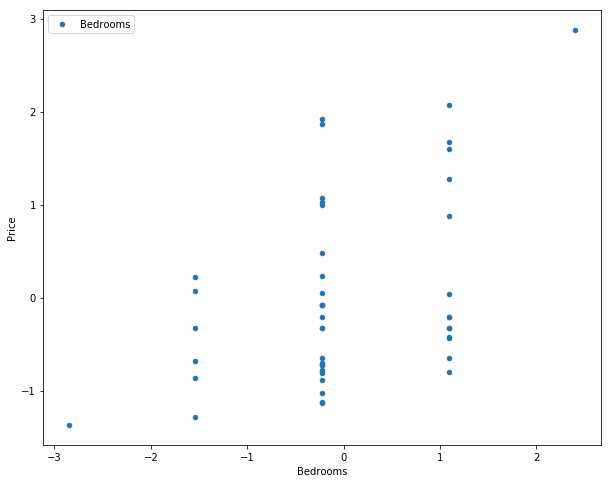

In [11]:
data.plot.scatter(x = 'Bedrooms', y = 'Price', figsize=(10,8), label='Bedrooms')
plt.show()

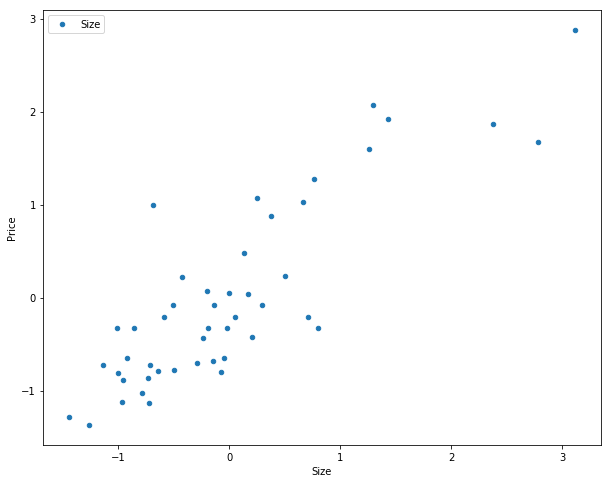

In [12]:
data.plot.scatter(x = 'Size', y = 'Price', figsize=(10,8), label='Size')
plt.show()

In [13]:
data.insert(0, 'Ones', 1) #添加全为1的列
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


### 构造数据集

In [15]:
X = data.iloc[:, 0:-1] #数据切片 第0行到倒数2行
X.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [24]:
y = data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [17]:
X = X.values #将dataframe转成数组
X.shape

(47, 3)

In [25]:
y = y.values

In [26]:
y = y.reshape(47, 1)
y.shape

(47, 1)

### 计算损失函数

In [27]:
def costFunc(X, y, theta):
    inner = np.power((X @ theta - y), 2)
    return np.sum(inner) / (2 * len(X)) #len(X)为X的行数

In [28]:
theta = np.zeros((3, 1))

In [29]:
costInit = costFunc(X, y, theta)
print (costInit)

0.48936170212765967


### 梯度下降函数

In [39]:
def grandientDescent(X, y, theta, alpha, iters, isprint = False):
    costs = [] #用于保存每次迭代的cost值
    for i in range(iters):
        hx = X @ theta - y
        theta = theta - (X.T @ hx) * alpha / len(X) #X.T为矩阵的转置
        cost = costFunc(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0 : 
            if isprint: print(cost) #默认不打印
    return theta, costs

### 不同学习率下的效果

In [36]:
candidateAlpha = [0.0003, 0.003, 0.0001, 0.001, 0.01]
iters = 2000

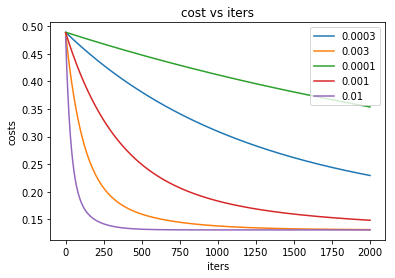

In [41]:
fig, ax = plt.subplots()
for alpha in candidateAlpha:
    _,costs = grandientDescent(X, y, theta, alpha, iters) #_表示不需要该返回值
    ax.plot(np.arange(iters), costs, label = alpha) #变量设置标签
    ax.legend()

ax.set(xlabel='iters', ylabel='costs', title='cost vs iters')
plt.show() #画图    

### 正规方程

In [45]:
def normalEquation(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y #linalg用于求矩阵的逆 具体推倒过程参考网上博客
    return theta

In [46]:
theta = normalEquation(X, y)
print (theta)

[[-1.21430643e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
